# Phase 2 - Week 1 - Day 2 AM - Training Artificial Neural Network: Part 1

**The purpose of this notebook is to demonstrate the effect of selecting the sigmoid activation function so that a vanishing gradient occurs.**

Then an experiment will be carried out if the activation function is changed to ReLU.

The vanishing gradient problem occurs when gradients (slopes) during backpropagation **become extremely small** as they are propagated backward through the layers of a deep neural network.

When gradients are very small, the updates to the network's parameters become negligible, leading to slow or stalled training.

The vanishing gradient problem is typically caused by activation functions like the sigmoid or hyperbolic tangent (tanh) functions, which squash input values into a small range (e.g., between 0 and 1 or -1 and 1). When these functions are repeatedly applied in deep networks, gradients can shrink to near-zero values.

As a result, deep layers of the network fail to learn meaningful representations from the data, and the network may not converge to a good solution.

**The model weights can become 0 in the training phase.**


# A. Import Libraries & Data Loading

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00


In [2]:
# Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal, HeNormal
from tensorflow.keras.layers import Input, Dense

# Check TensorFlow version
print(tf.__version__)

2.15.1


In this experiment, we will create an artificial dataset regarding Binary Classification

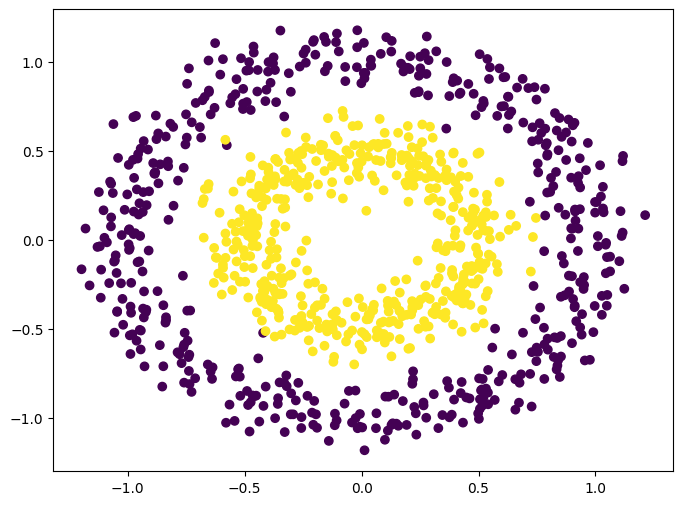

In [3]:
# Make Dataset

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
# Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (850, 2)
Test size  :  (150, 2)


# B. Model with Sigmoid

For first model, we will create an ANN model with configuration :

* 2 input neuron (based on the number of features)
* 5 hidden layer
* Each hidden layer will contains 5 hidden neurons
* Weight Initialization : Random Normal
* Loss function : Binary Cross Entropy
* Optimizer : Adam

In [5]:
# Create ANN Model

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = RandomNormal(mean=0, stddev=1, seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_sigmoid = Sequential([
    Input(shape=(2,), name='input-layer'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile
model_sigmoid.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
model_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 5)                 15        
                                                                 
 hidden-layer-2 (Dense)      (None, 5)                 30        
                                                                 
 hidden-layer-3 (Dense)      (None, 5)                 30        
                                                                 
 output-layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Train the ANN Model

model_sigmoid.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
27/27 [==============================] - 5s 11ms/step - loss: 0.7019 - accuracy: 0.4894
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 0.6973 - accuracy: 0.4894
Epoch 3/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6952 - accuracy: 0.4353
Epoch 4/100
27/27 [==============================] - 0s 12ms/step - loss: 0.6942 - accuracy: 0.4294
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 0.6938 - accuracy: 0.5141
Epoch 6/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.5624
Epoch 7/100
27/27 [==============================] - 0s 14ms/step - loss: 0.6936 - accuracy: 0.6247
Epoch 8/100
27/27 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.6306
Epoch 9/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.6212
Epoch 10/100
27/27 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.6141
Ep

In [7]:
# Predict test-set

model_sigmoid.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5533


[0.6800611019134521, 0.5533333420753479]

Unfortunately, the performance of the model using the sigmoid is too low when tested with a test-set. The accuracy value only reaches 58 %.

# C. Model with ReLU

Let's improve our model by changing :

* The activation function to ReLU
* Weight initialization to HeNormal (HeNormal is more suitable for use by ReLU for weight initialization techniques).

In [8]:
# Create ANN Model

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = HeNormal(seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_relu = Sequential([
    Input(shape=(2,), name='input-layer'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile
model_relu.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
model_relu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 5)                 15        
                                                                 
 hidden-layer-2 (Dense)      (None, 5)                 30        
                                                                 
 hidden-layer-3 (Dense)      (None, 5)                 30        
                                                                 
 output-layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the ANN Model

model_relu.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 4ms/step - loss: 0.8012 - accuracy: 0.4788
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.7506 - accuracy: 0.4941
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.4753
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4659
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.4765
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6644 - accuracy: 0.5235
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.5494
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.5835
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 0.6129
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.6259
Epoch 11/

In [10]:
# Predict test-set

model_relu.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 1.0000


[0.012447034940123558, 1.0]

After changing the activation function and weight initialization, it can be seen that the performance of the train and test has increased drastically, even approaching perfect conditions. Hooray.

# D. The Gradient

Let's look at the gradient differences between models that use the Sigmoid activation function with ReLU. Let's prove whether it is true that the Sigmoid activation function leads to a vanish gradient or not.

In [11]:
# Create a Function to Store Weights from Each Epoch

def train_model(X, y, model, loss_function, optimizer, n_epochs=100, batch_size=32):
    "Run training loop manually"
    train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    gradhistory = []
    losshistory = []
    def recordweight():
        data = {}
        for g,w in zip(grads, model.trainable_weights):
            if '/kernel:' not in w.name:
                continue # skip bias
            name = w.name.split("/")[0]
            data[name] = g.numpy()
        gradhistory.append(data)
        losshistory.append(loss_value.numpy())
    for epoch in range(n_epochs):
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_function(y_batch_train, y_pred)

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            if step == 0:
                recordweight()

    recordweight()
    return gradhistory, losshistory

In [12]:
# Create a Function to Plot the Gradients of Each Epoch

def plot_gradient(gradhistory, losshistory):
    "Plot gradient mean and sd across epochs"
    fig, ax = plt.subplots(1, 3, sharex=True, constrained_layout=True, figsize=(15, 4))
    ax[0].set_title("Mean gradient")
    for key in gradhistory[0]:
        ax[0].plot(range(len(gradhistory)), [w[key].mean() for w in gradhistory], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in gradhistory[0]:
        ax[1].semilogy(range(len(gradhistory)), [w[key].std() for w in gradhistory], label=key)
    ax[1].legend()
    ax[2].set_title("Loss")
    ax[2].plot(range(len(losshistory)), losshistory)
    plt.show()

-- Sigmoid Model -- 


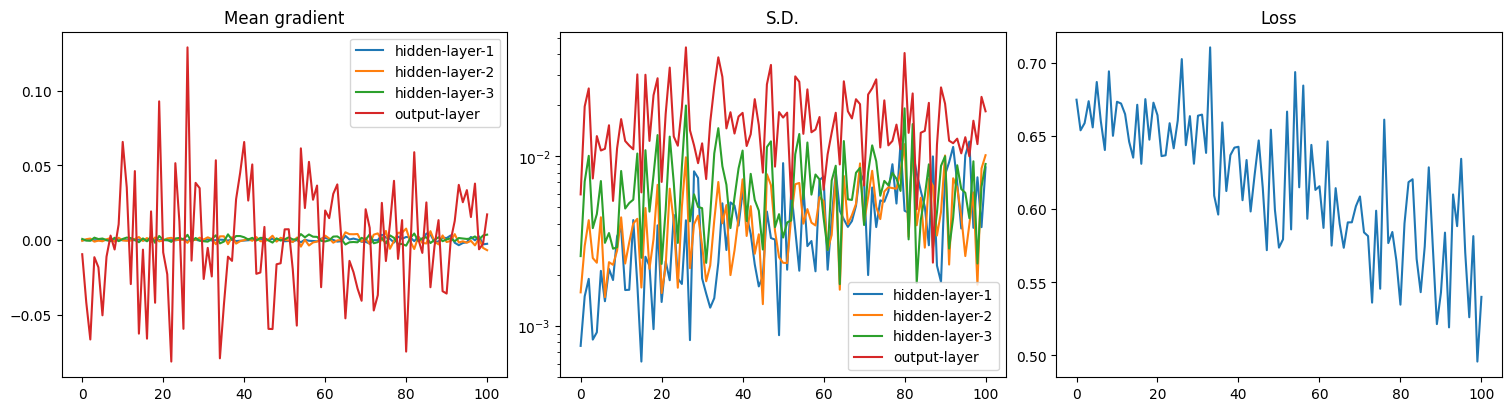


-- ReLU Model -- 


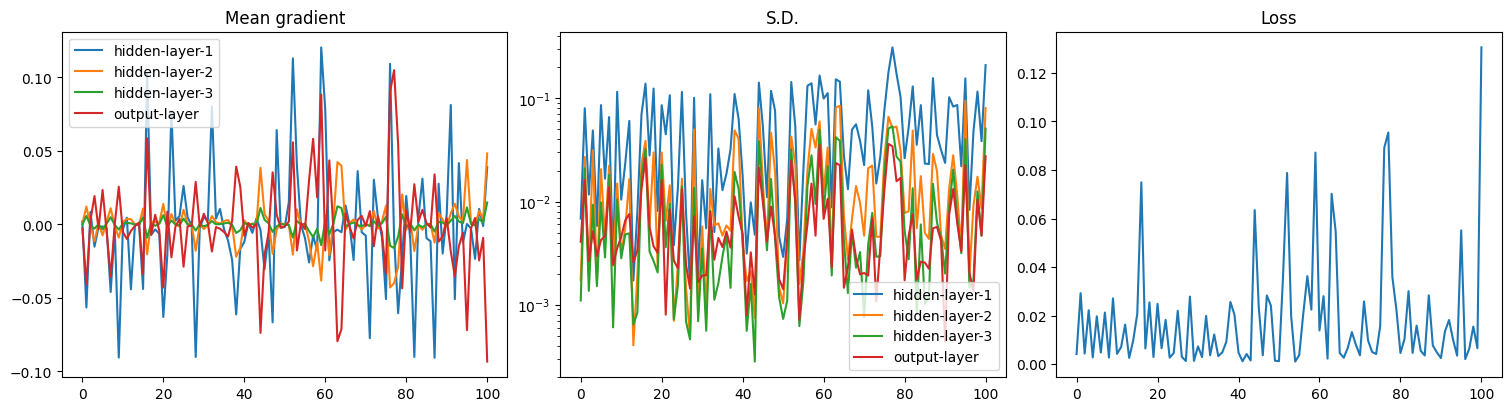


CPU times: user 1min 58s, sys: 1.75 s, total: 1min 59s
Wall time: 2min 10s


In [13]:
# Check the Gradients on Sigmoid Model and ReLU Model

%%time
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()
gradhistory_sigmoid, losshistory_sigmoid = train_model(X_train, y_train, model_sigmoid, loss_function, optimizer, n_epochs=100, batch_size=32)

loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()
gradhistory_relu, losshistory_relu = train_model(X_train, y_train, model_relu, loss_function, optimizer, n_epochs=100, batch_size=32)

print('-- Sigmoid Model -- ')
plot_gradient(gradhistory_sigmoid, losshistory_sigmoid)
print('')

print('-- ReLU Model -- ')
plot_gradient(gradhistory_relu, losshistory_relu)
print('')

**INSIGHTS :**

1. Sigmoid model :
   * From the `Mean gradient` plot, it can be seen that only the gradients from the output layer has a fluctuating gradient.
   * While the gradient of the other layers is around `0`.
   * This causes the the loss value decreases slowly and even looks stagnant. This phenomenon is called vanishing gradient.

2. ReLU model :
   * The gradient that comes from the ReLU model varies in each layer and tends to go up and down so it doesn't stagnate at `0`.
   * This causes the loss values to change, allowing the model to reach its optimal point.